In [1]:
import numpy as np
from numpy import nan

from verbose import print_state, print_experience, print_buffer, print_shapes
from verbose import print_action_available, print_interaction, print_cummulative_reward
# from utils import 
from constant import *
from plot import plot_evolution
from pre_processing import pre_processing_state, denormalize_vector


from DQN import DQNAgent
from env import Env
from utils_class import EpsilonGreedy


%load_ext autoreload
%autoreload 2


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
sess = InteractiveSession(config=config)


2022-06-20 06:00:59.024980: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-20 06:00:59.025010: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


2022-06-20 06:01:00.064613: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-20 06:01:00.084718: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-06-20 06:01:00.084751: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: manjaro
2022-06-20 06:01:00.084755: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: manjaro
2022-06-20 06:01:00.084888: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.48.7
2022-06-20 06:01:00.084906: I tensorflow/stream_executor/cuda/cuda_diagn

In [2]:
STACK_SIZE = 3
NBR_STACK = 2

env = Env(STACK_SIZE)
strategy = EpsilonGreedy(MIN_EPSILON, START_EPSILON, DECAY)
agent = DQNAgent(STACK_SIZE, NBR_STACK, len(env.action_space()))

In [3]:
print_state(env, shape=True)

---State t---
-A-	-B-
___________	
|33.0	nan|
|62.0	nan|
|50.0	nan|
___________	
A shape : (3, 1)
B shape : (3, 1)
___________	
------------
Env : in progress
------------


Episode : [0]
---State t---
-A-	-B-
___________	
|63.0	nan|
|89.0	nan|
|92.0	nan|
___________	
------------
Env : in progress
------------
=== Actions available ===
rotate_a
inverse_rotate_a
swap_a
push_b
Exploration
----------------------------------
Action : [push_b]
Reward : [-1]
----------------------------------
---State t---
-A-	-B-
___________	
|89.0	63.0|
|92.0	nan|
|nan	nan|
___________	
------------
Env : in progress
------------
=== Actions available ===
rotate_a
inverse_rotate_a
swap_a
push_b
push_a
Exploration
----------------------------------
Action : [push_b]
Reward : [-1]
----------------------------------
---State t---
-A-	-B-
___________	
|92.0	89.0|
|nan	63.0|
|nan	nan|
___________	
------------
Env : in progress
------------
=== Actions available ===
rotate_b
inverse_rotate_b
swap_b
push_b
push_a
Exploration
----------------------------------
Action : [push_b]
Reward : [-1]
----------------------------------
---State t---
-A-	-B-
___________	
|nan	92.0|
|nan	89.0|


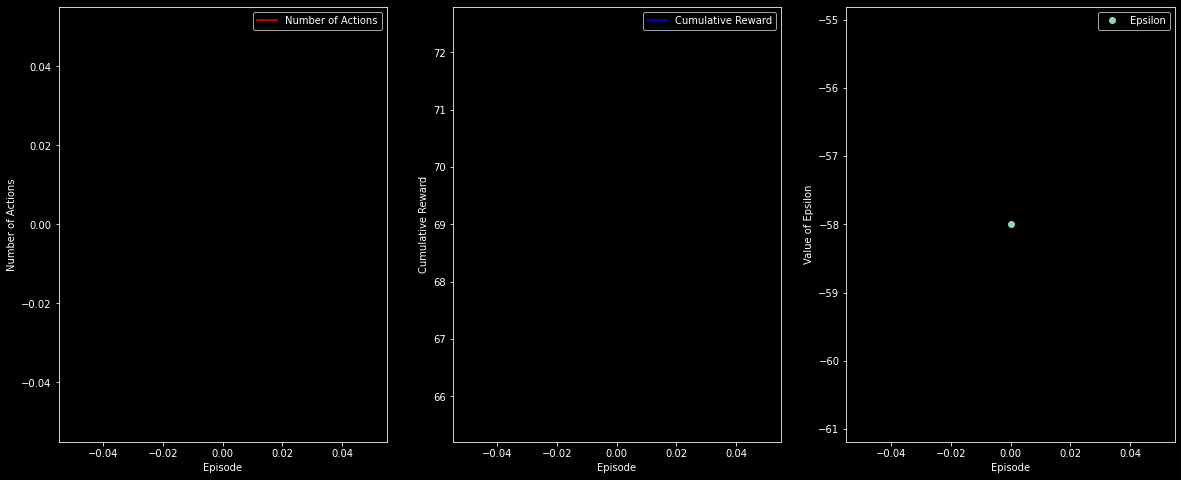

In [10]:
episode_durations = list()
cummulative_reward = list()
epsilon = list()

for episode in range(EPISODE):
    
    print(f"Episode : [{episode}]")
    env.reset(STACK_SIZE)
    
    state = env.get_state()
    # print_state(env, shape=True)
    
    timesteps = 0
    while (1):
        
        # action_available(env)
        print_state(env)
        timesteps += 1
        
        exploration_rate = strategy.get_exploration_rate(timesteps)
        print_action_available(env)
        action = env.choose_action(state, agent.policy_model, exploration_rate)
        reward = env.reward()
        next_state = env.get_state()
        print_interaction(exploration_rate, action, reward)
        
        
        
        experience = env.create_experience(state, action, next_state, reward)
        env.replaymemory.push(experience)
        state = next_state
        
        # print_experience(experience)
        if env.replaymemory.can_provide_sample(BATCH_SIZE):
            print("======== START TRAIN ========")
            
            buffer = env.replaymemory.get_sample(BATCH_SIZE)
            # print_buffer(buffer)
            
            states, actions, next_states, rewards, dones = env.replaymemory.extract_value(buffer)
            # print_shapes(states, next_states)
            agent.train(states, next_states, buffer)
        
        # print(f"Env : {env.state()}")
        if (env.state() == 'done'):
            print_state(env)
            print_cummulative_reward(env)
            epsilon.append(strategy.epsilon)
            episode_durations.append(timesteps)
            cummulative_reward.append(env.cummulative_reward)
            
            plot_evolution(episode, episode_durations, cummulative_reward)
            break
            
    
    

In [5]:
env.replaymemory.print_history(BATCH_SIZE)

Actions : 3 	 Reward : 92
